In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_regression
from sklearn.decomposition import PCA
sns.set_theme(style="ticks")


In [12]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=4)

In [13]:
X_df = pd.DataFrame(X, columns=['x1','x2'])
y_df = pd.DataFrame(y, columns=["class"])
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
data.head()

,x1,x2,class
0,-7.254811,4.733561,0
1,-4.445817,-3.048550,1
2,10.463869,7.704828,0
3,-7.363565,0.042258,1
4,-16.294006,-3.550975,1


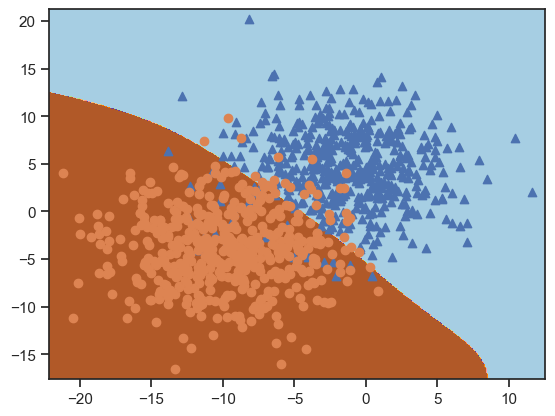

In [14]:
model = SVC()
model.fit(X, y)
yhat = model.predict(X)
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz,  cmap="Paired")
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], marker="^" if class_value == 0 else "o")
plt.savefig("classification.pdf", format="pdf", dpi=300, bbox_inches='tight')

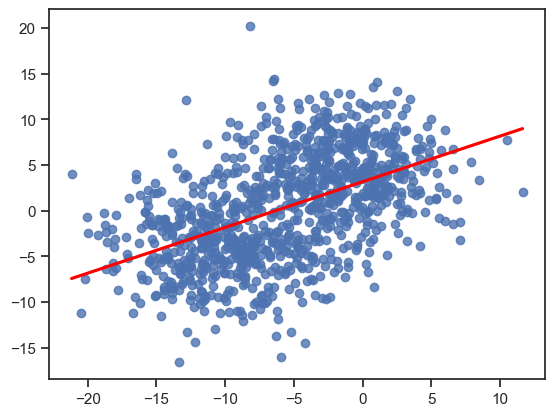

In [15]:
ax = sns.regplot(x="x1", y="x2", data=data, ci=0, line_kws={"color": "red"})
ax.set(xlabel="", ylabel="")
plt.savefig("regression.pdf", format="pdf", dpi=300, bbox_inches='tight')